In [ ]:
import torch
torch.cuda.is_available()

In [3]:
from pygltflib import GLTF2
from PIL import Image
from io import BytesIO
import struct

def extract_textures_from_glb(path):
    # --- Load glTF JSON ---
    gltf = GLTF2().load(path)

    # --- Read full GLB ---
    with open(path, "rb") as f:
        glb = f.read()

    # --- Parse GLB header ---
    magic, version, length = struct.unpack_from("<III", glb, 0)
    assert magic == 0x46546C67  # 'glTF'

    # --- Read first chunk header (JSON) ---
    json_chunk_length, json_chunk_type = struct.unpack_from("<II", glb, 12)
    assert json_chunk_type == 0x4E4F534A  # 'JSON'

    # --- Compute JSON and BIN chunk positions ---
    json_chunk_start = 20
    bin_chunk_header_start = json_chunk_start + json_chunk_length
    bin_chunk_length, bin_chunk_type = struct.unpack_from(
        "<II", glb, bin_chunk_header_start)

    assert bin_chunk_type == 0x004E4942  # 'BIN\0'

    bin_chunk_data_start = bin_chunk_header_start + 8
    bin_chunk_data_end   = bin_chunk_data_start + bin_chunk_length

    bin_data = glb[bin_chunk_data_start:bin_chunk_data_end]   # <-- THIS is the buffer base

    # --- Extract all images ---
    textures = []
    for img in gltf.images:
        if img.bufferView is None:
            continue

        bv = gltf.bufferViews[img.bufferView]

        start = bv.byteOffset or 0
        end = start + bv.byteLength

        img_bytes = bin_data[start:end]
        textures.append(Image.open(BytesIO(img_bytes)))

    return textures


Texture 0: (1024, 1024)
  width:  1024
  height: 1024


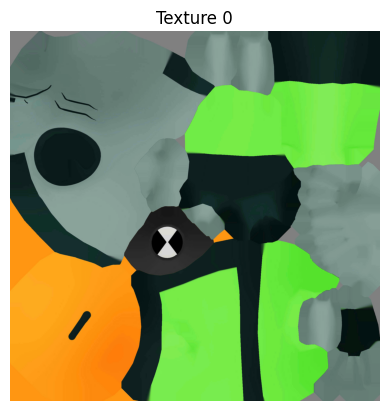

In [6]:
textures = extract_textures_from_glb("data/glbs/glbs_1k/000-000/000a8b029597498c95889707082d9fb1_1024.glb")
import matplotlib.pyplot as plt
for i, tex in enumerate(textures):
    plt.figure()
    plt.title(f"Texture {i}")
    plt.imshow(tex)
    plt.axis("off")
    print(f"Texture {i}: {tex.size}")        # (width, height)
    print(f"  width:  {tex.width}")
    print(f"  height: {tex.height}")

